In [9]:
import pandas as pd 

base = pd.read_csv('house_prices.csv')
### Nosso previsor será o tamanho da casa (localizado na coluna 5)
X = base.iloc[:, 5].values
X = X.reshape(-1,1)
### Nosso objetivo será o valor da casa (localizado na coluna 2)
Y = base.iloc[:, 2].values

In [10]:
### Separando a base de dados entre treinamento e teste
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento, Y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
score = regressor.score(X_treinamento, Y_treinamento)
score

0.49453356717789776

Text(0, 0.5, 'Preço (U$)')

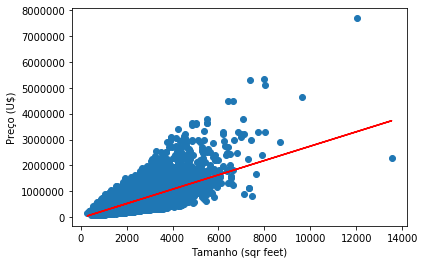

In [22]:
import matplotlib.pyplot as plt
plt.scatter(X_treinamento, Y_treinamento)
plt.plot(X_treinamento, regressor.predict(X_treinamento), color = 'red')
plt.xlabel('Tamanho (sqr feet)')
plt.ylabel('Preço (U$)')

In [16]:
### Fazendo previsões com o regressor
previsoes = regressor.predict(X_teste)

In [17]:
### Vendo a média da diferença e o seu valor absoluto dos resultados previstos e reais
resultado = abs(Y_teste - previsoes)
### Média que irá variar (quanto menor, melhor)
resultado.mean()

172604.1288999542

In [19]:
### Forma mais bonita para calcular o erro absoluto e R²
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y_teste, previsoes)
mse = mean_squared_error(Y_teste, previsoes)
mae, mse

(172604.1288999542, 70170013932.11592)

Text(0, 0.5, 'Preço (U$)')

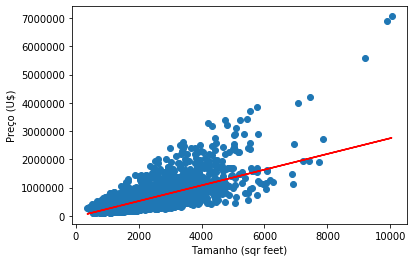

In [23]:
### Visualizando os resíduos no X e Y teste
plt.scatter(X_teste, Y_teste)
plt.plot(X_teste, regressor.predict(X_teste), color = 'red')
plt.xlabel('Tamanho (sqr feet)')
plt.ylabel('Preço (U$)')

In [21]:
regressor.score(X_teste, Y_teste)

0.48889929019453016